In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score

# Load Data Iris

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# EDA

<Axes: >

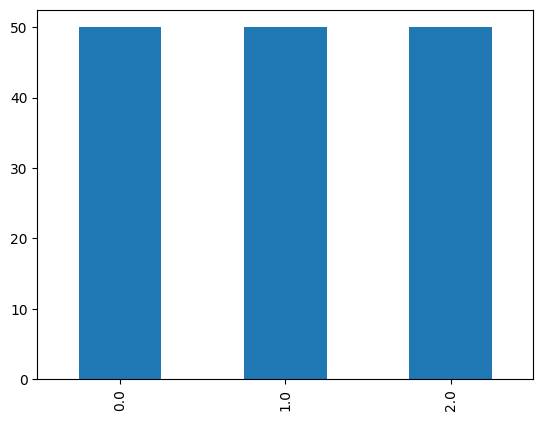

In [3]:
jml_category = iris_df.target.value_counts()
jml_category.plot(kind='bar')

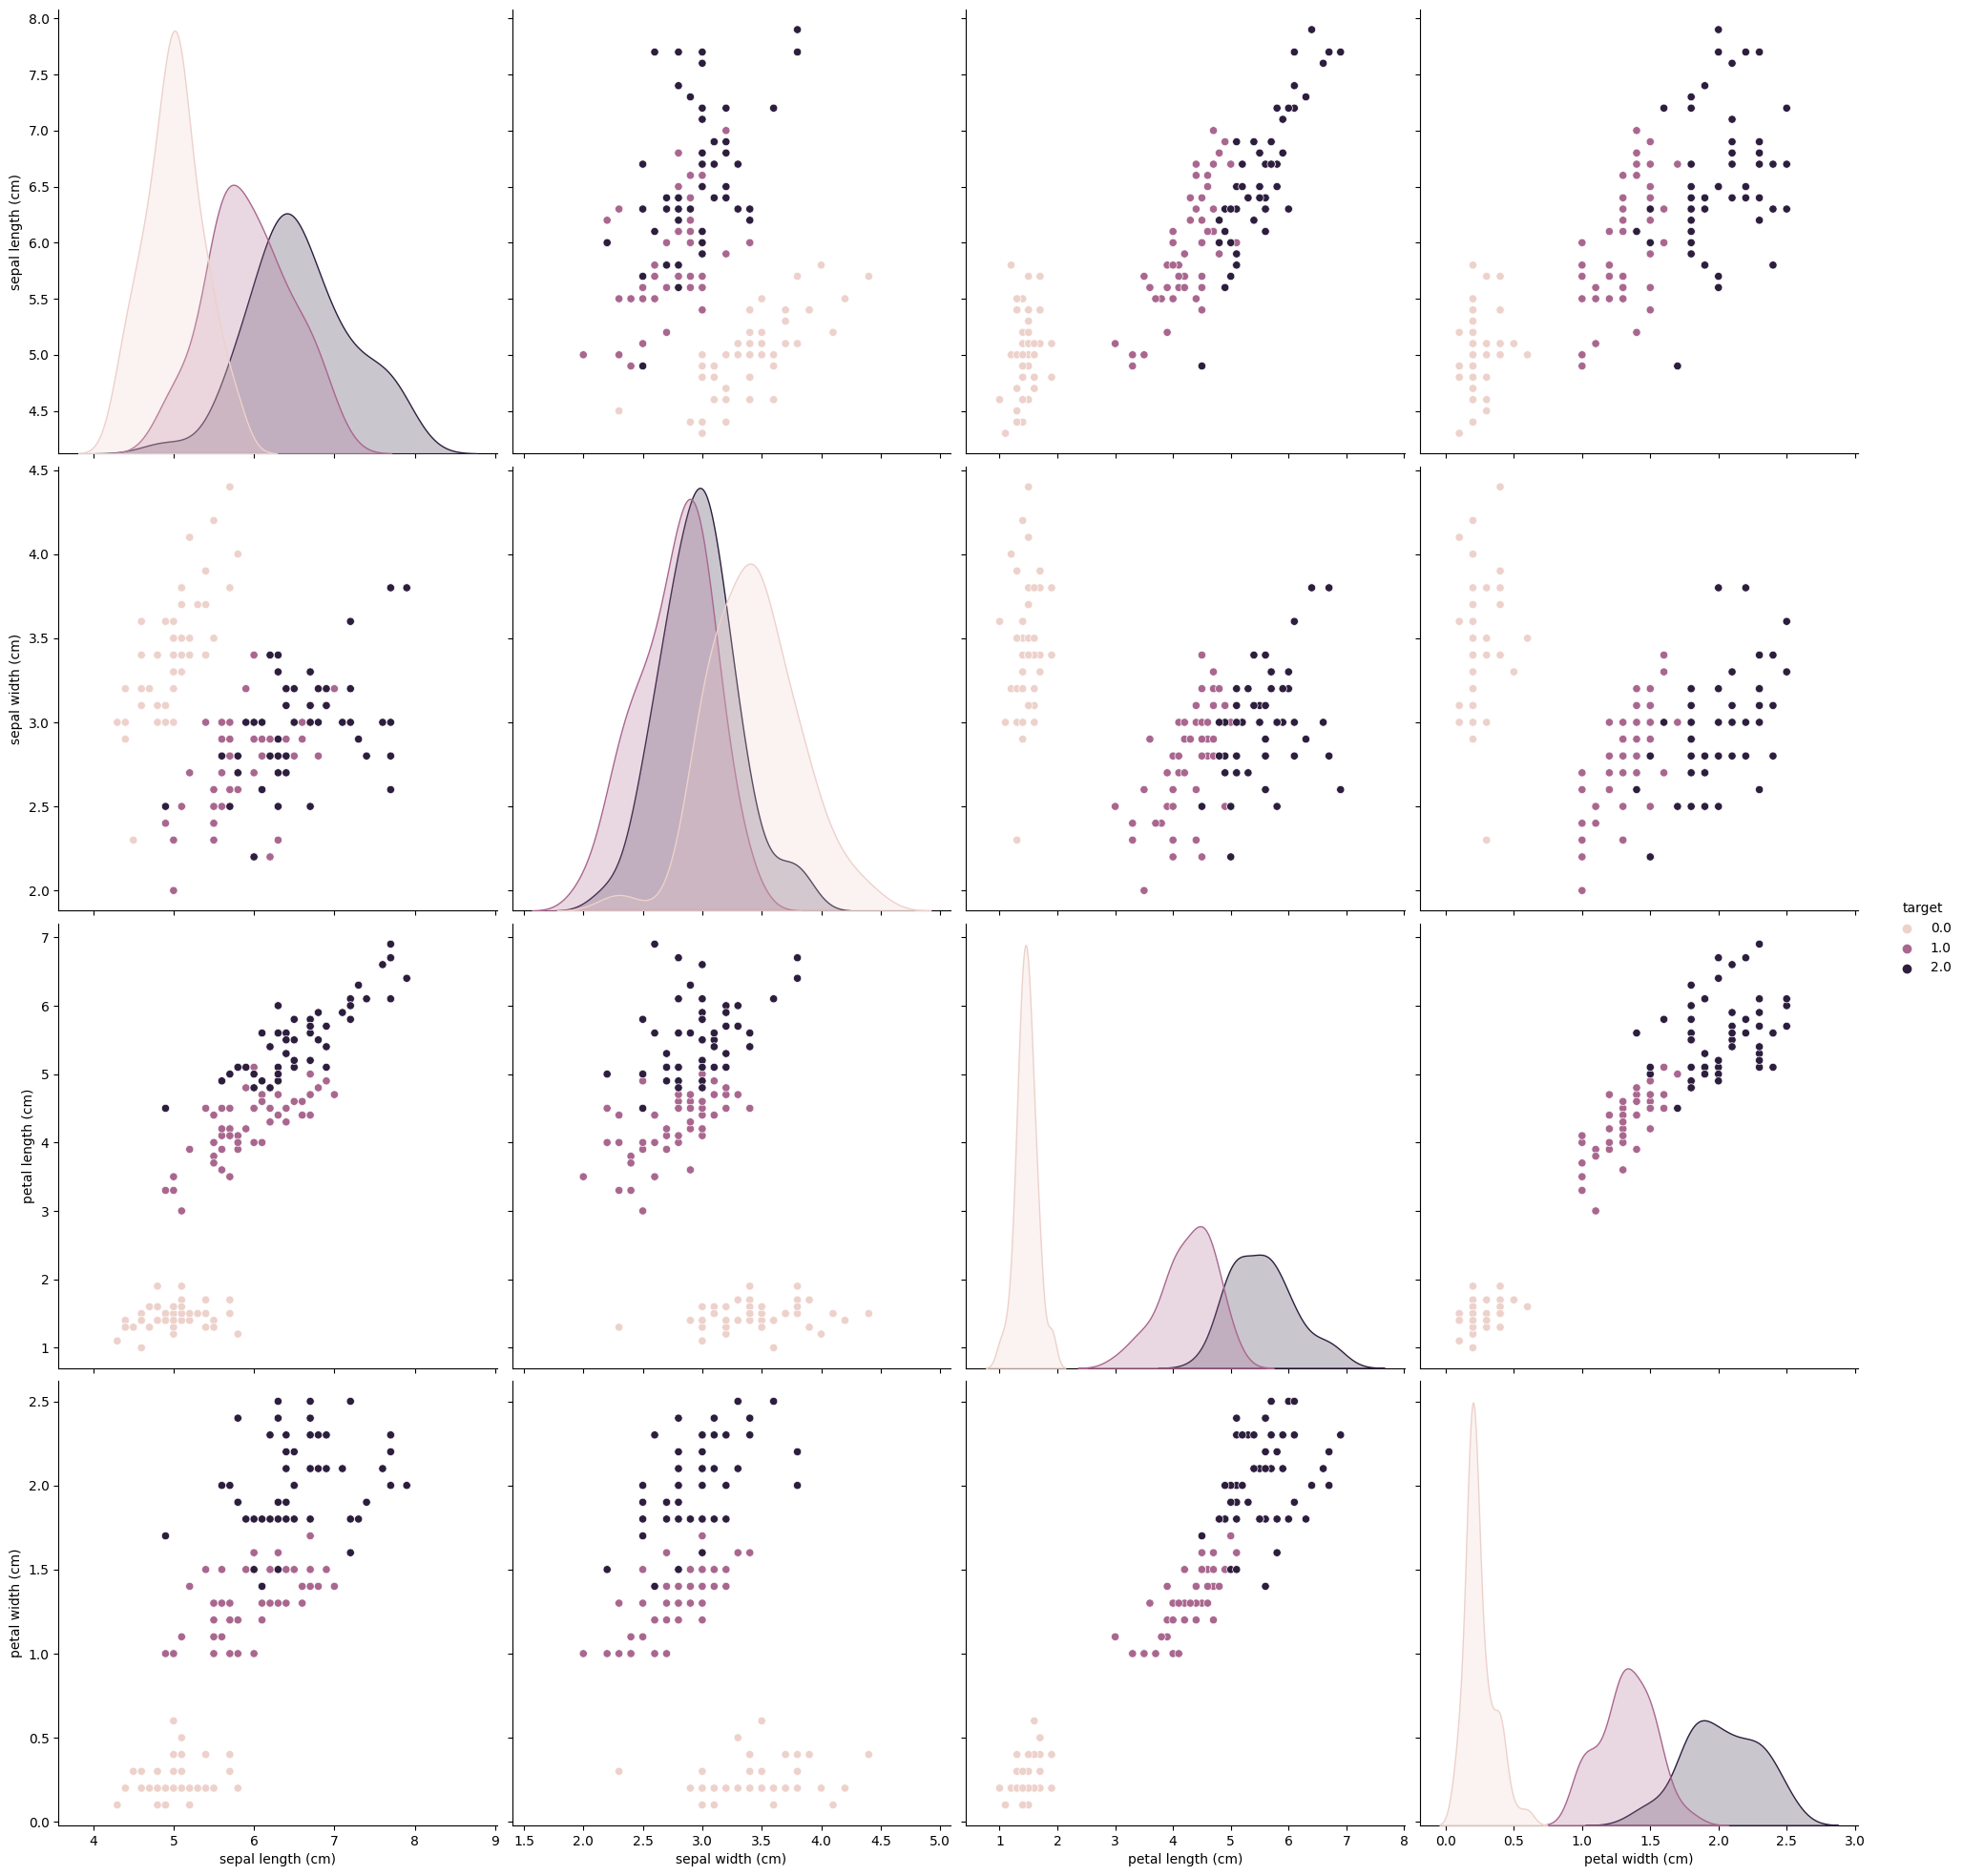

In [4]:
sns.pairplot(iris_df, hue = "target", height = 5)

# Data Preprocessing
## Pemisahan Features (X) dan Target (Y)

In [5]:
X = iris_df.drop(["target"], axis = 1)
y = iris_df["target"]
print(X.shape, y.shape)

(150, 4) (150,)


## Scaling Nilai Features (X)

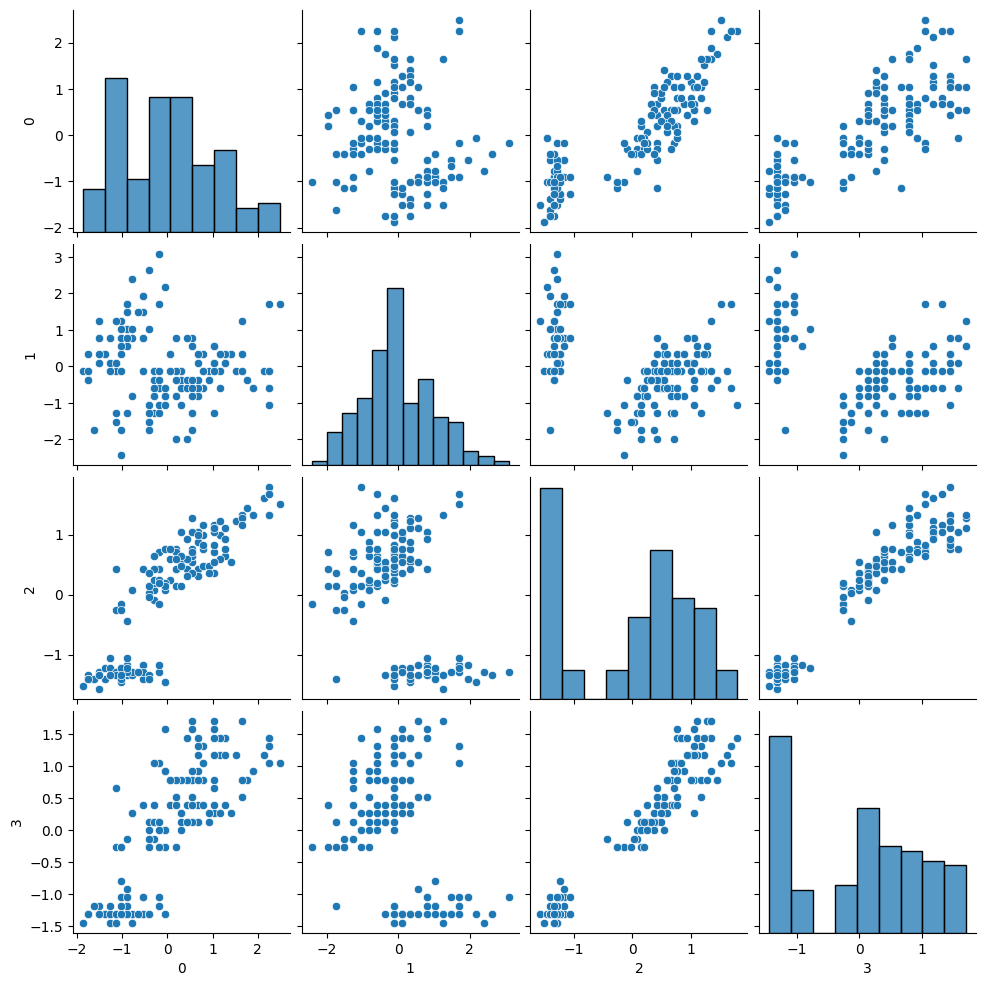

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)
sns.pairplot(pd.DataFrame(X))

## Split Data Training dan Testing
memotong data sample menjadi 2 bagian dengan rasio 0.8 dan 0.2

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (120, 4) Y (120,)
Data Test: X (30, 4) Y (30,)


# Model Development
## Training Model
### Naive Bayes

In [8]:
# Proses training model
nb_mod = GaussianNB()
nb_mod.fit(X_train, y_train)

GaussianNB()

In [9]:
### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = nb_mod.predict(X_train)
y_pred[:5]

array([0., 1., 1., 0., 1.])

In [10]:
### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.9583333333333334

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.93      0.95      0.94        40
         2.0       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [11]:
### Memprediksi data testing yang sudah di siapkan
y_pred = nb_mod.predict(X_test)
y_pred[:5]

array([0., 2., 1., 1., 0.])

In [12]:
### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Testing: 0.9666666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Quiz
**1. Dari dua report hasil evaluasi model NB di atas, nilai prediksi data testing lebih tinggi dibandingkan nilai prediksi data testing. Mengapa hal itu terjadi? Apa yang dapat disimpulkan?**

- Model NB memiliki kemampuan generalisasi yang baik untuk membangun model dengan menggunakan data terbatas
- Hal ini berkaitan dengan model complexity algorithma NB yang paling kecil dibandingkan dengan algorithma ML lainnya.

**2. Dengan langkah yang sama, silahkan coba evaluasi algoritma lain yaitu KNN dan tarik kesimpulan atas hasil percobaan**

silahkan gunakan model berikut pada percobaan

knn_mod = KNeighborsClassifier()

In [13]:
# Proses training model
knn_mod = KNeighborsClassifier()
knn_mod.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = knn_mod.predict(X_train)
y_pred[:5]

array([0., 1., 1., 0., 1.])

In [15]:
### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.975

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.95      0.97      0.96        40
         2.0       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [16]:
### Memprediksi data testing yang sudah di siapkan
y_pred = knn_mod.predict(X_test)
y_pred[:5]

array([0., 2., 1., 1., 0.])

In [17]:
### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Testing: 0.9333333333333333

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.83      1.00      0.91        10
         2.0       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### kesimpulan
- nilai evaluasi testing model KNN menunjukan nilai yang lebih rendah dibandingkan dengan model NB. sehingga pada settingan default, model KNN dinilai lebih jelek dibandingkan dengan model NB
- model KNN memiliki hyper parameter yang dapat diubah sehingga langkah tuning perlu dilakukan untuk meningkatkan performa model

**Percobaan n_neighbors berbeda**

Silahkan buat percobaan dengan menggunakan nilai n_neighbors yang berbeda untuk melatih model KNN dan bandingkan hasil evaluasi dengan nilai yang berbeda tersebut.

gunakan nilai n_neighbors = [4,7,10]

In [18]:
# n_neighbors 4
knn_mod = KNeighborsClassifier(n_neighbors=4)
knn_mod.fit(X_train, y_train)

### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = knn_mod.predict(X_train)
y_pred[:5]

### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

### Memprediksi data testing yang sudah di siapkan
y_pred = knn_mod.predict(X_test)
y_pred[:5]

### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.9583333333333334

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.91      0.97      0.94        40
         2.0       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Performa Testing: 0.9333333333333333

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.83      1.00      0.91        10
         2.0       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [19]:
# n_neighbors 7
knn_mod = KNeighborsClassifier(n_neighbors=7)
knn_mod.fit(X_train, y_train)

### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = knn_mod.predict(X_train)
y_pred[:5]

### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

### Memprediksi data testing yang sudah di siapkan
y_pred = knn_mod.predict(X_test)
y_pred[:5]

### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.9666666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.93      0.97      0.95        40
         2.0       0.97      0.93      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Performa Testing: 0.9666666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [20]:
# n_neighbors 10
knn_mod = KNeighborsClassifier(n_neighbors=10)
knn_mod.fit(X_train, y_train)

### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = knn_mod.predict(X_train)
y_pred[:5]

### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

### Memprediksi data testing yang sudah di siapkan
y_pred = knn_mod.predict(X_test)
y_pred[:5]

### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.9583333333333334

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.91      0.97      0.94        40
         2.0       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Performa Testing: 0.9666666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.91      1.00      0.95        10
         2.0       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Kesimpulan**
- Mengubah nilai n_neighbors mempengaruhi nilai testing model KNN, nilai lebih tinggi (7 dan 10) menunjukan performa lebih baik dibandingkan dengan nilai 4 dan default
- diantara nilai 7 dan 10, nilai n_neighbors = 7 memiliki nilai evaluasi training lebih tinggi, sehingga dapat ditarik kesimpulan bahwa nilai n_neighbors = 7 merupakan nilai hyperparameter yang paling tepat untuk menghasilkan model knn yang optimal